#Customer Segmentation Using Clustering Techniques


##Objective:
In this assignment, you will perform customer segmentation using unsupervised learning techniques. The goal is to group customers from a grocery store's dataset into clusters based on their behaviors and demographics. You will explore various steps, including data cleaning, feature engineering, dimensionality reduction, and clustering. The end goal is to develop actionable insights to inform marketing strategies.

##Dataset:

###Dataset Name: Customer Personality Analysis
Source: Kaggle
Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
- Part 1: Importing Libraries and Loading Data
- Part 2: Data Cleaning and Feature Engineering
- Part 3: Exploratory Data Analysis (EDA)
- Part 4: Data Preprocessing
- Part 5: Dimensionality Reduction using PCA
- Part 6: Clustering
- Part 7: Results and your interpretations


#Download Dataset from Kaggle-API

In [2]:
! pip install -q kaggle

In [3]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gouravsen","key":"b9a5856a9d71d42ebfdfc446cf5bc9e7"}'}

In [4]:
! mkdir ~/.kaggle #create new directory kaggle
! cp kaggle.json ~/.kaggle/ #copy the file kaggle.json to this new directory

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d imakash3011/customer-personality-analysis #download the customer personality dataset

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 33.0MB/s]


In [7]:
!unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


#Import libraries and Load data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [9]:
df=pd.read_csv("marketing_campaign.csv",sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.shape

(2240, 29)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [16]:
df['Income'].describe().T

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


# Data Cleaning and Feature Engineering

- We have seen that there are null values in Income column. We need to impute it.
- Lets see the distribution of Income.

<Axes: xlabel='Income', ylabel='Count'>

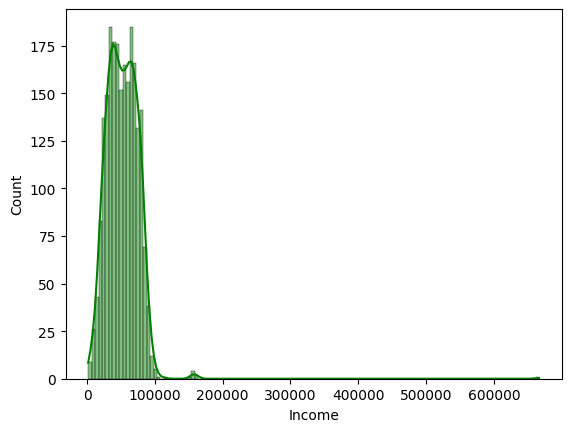

In [27]:
sns.histplot(df.Income,kde=True,color='green')

It looks like the data is left skewed. So median is the best choice as it is less affected by skewness.

In [33]:
df['Income']=df['Income'].fillna(df['Income'].median())

<Axes: xlabel='Income', ylabel='Count'>

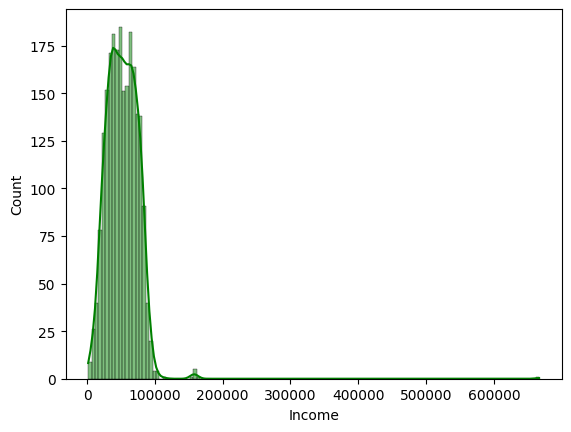

In [29]:
sns.histplot(df.Income,kde=True,color='green')

In [38]:
has_duplicates = df.duplicated().any()
print(has_duplicates)

False


In [41]:
#Lets create new features which can be more helpfull for clustering
current_year = 2024
df['Age'] = current_year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['Tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'])).dt.days
df['Total_child']=df['Kidhome'] + df['Teenhome']
df['Total_Spent'] = df['Kidhome'] + df['MntWines']+df['MntMeatProducts'] + df['MntFishProducts']+df['MntGoldProds'] + df['MntSweetProducts']+df['MntFruits']
df['Total_Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


# EDA

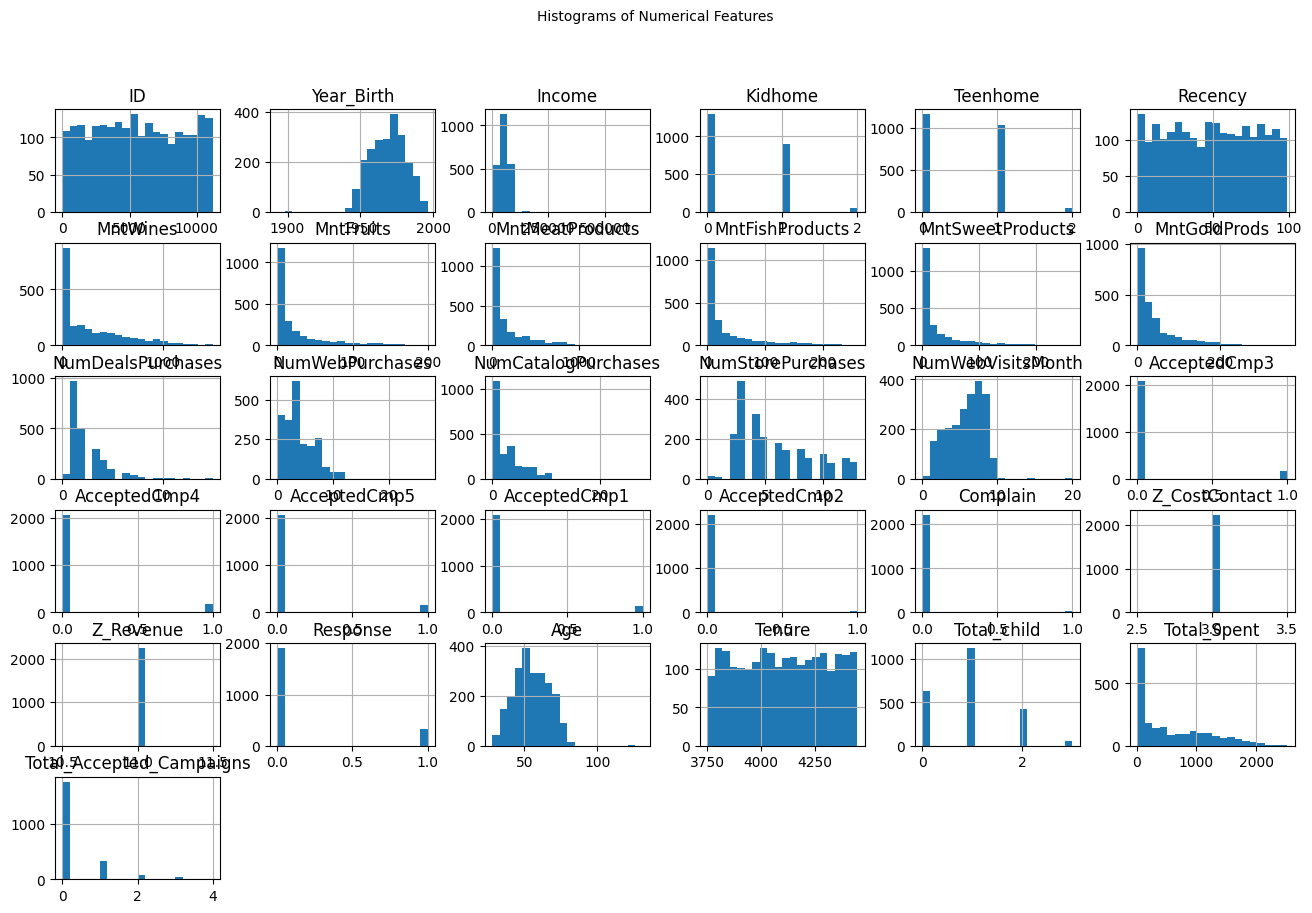

In [48]:
# List of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical features
df[numerical_features].hist(figsize=(16, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=10)
plt.show()



<Axes: xlabel='Total_Spent', ylabel='Count'>

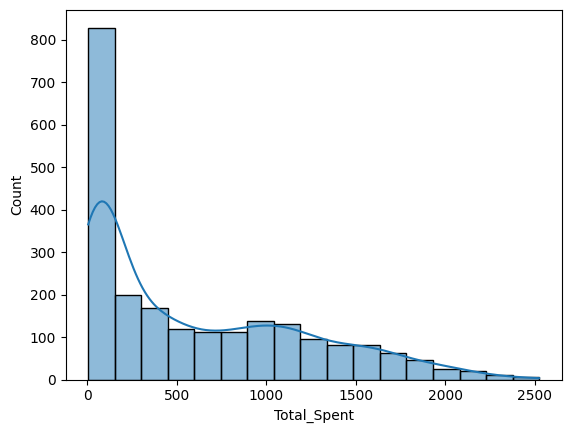

In [57]:
sns.histplot(df['Total_Spent'],kde=True)

<ipython-input-58-bcb2c55c0b39>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Recency', kde=True,palette=sns.color_palette("ch:start=.2,rot=-.3"))


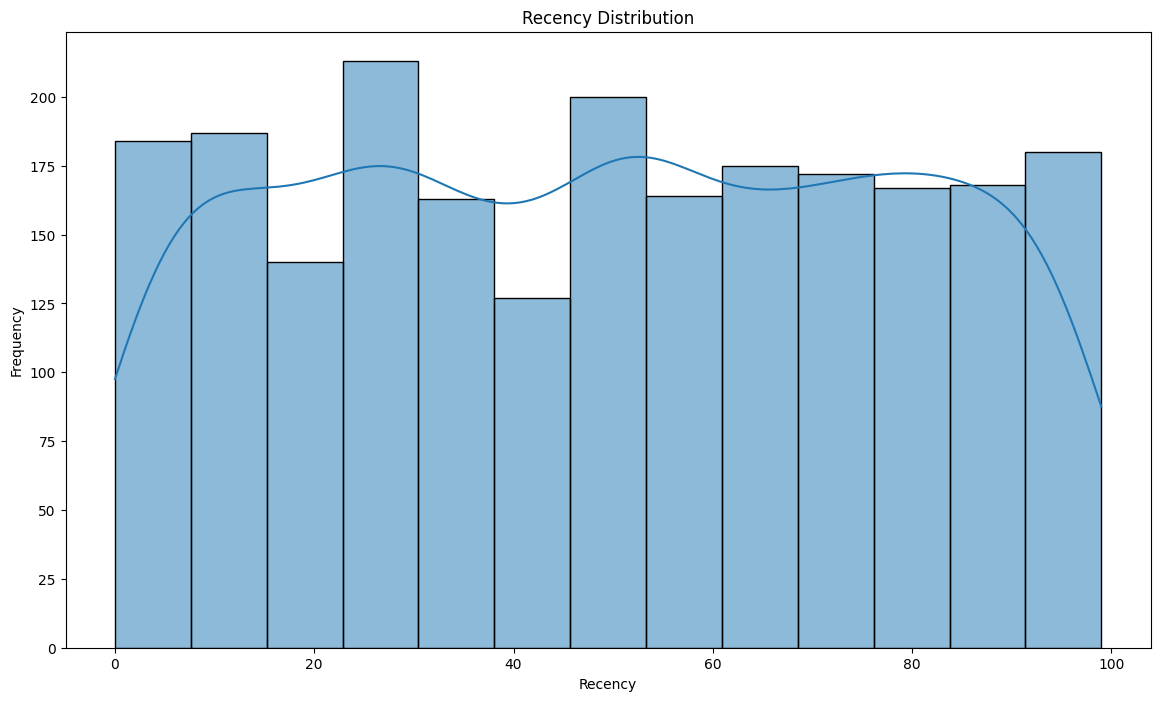

In [58]:
plt.figure(figsize=[14,8])
sns.histplot(data=df, x='Recency', kde=True,palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

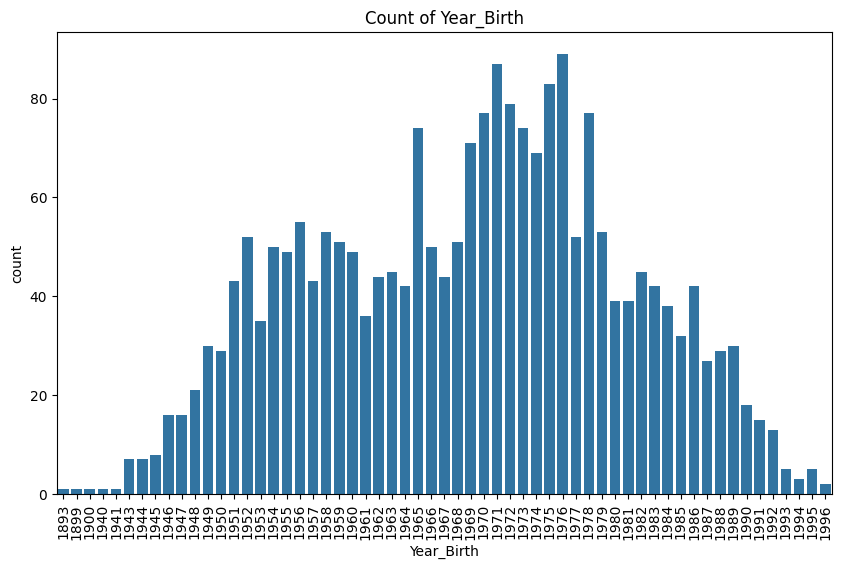

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size for better readability
plt.figure(figsize=(10, 6))

# Plot count plot for Year_Birth and Education
sns.countplot(data=df,x='Year_Birth')
# Rotate the x labels for readability
plt.xticks(rotation=90)
plt.title("Count of Year_Birth")
plt.show()


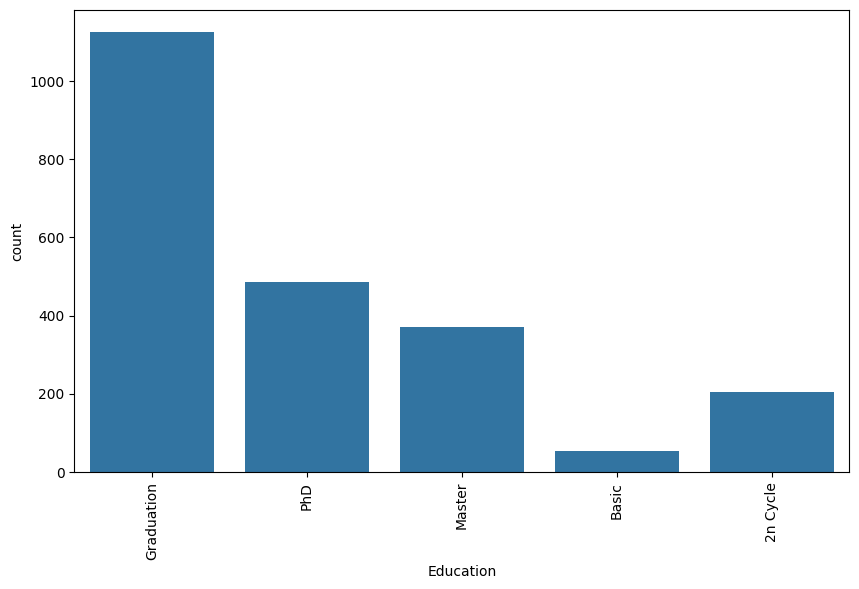

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size for better readability
plt.figure(figsize=(10, 6))

# Plot count plot for Year_Birth and Education
sns.countplot(data=df,x='Education')
# Rotate the x labels for readability
plt.xticks(rotation=90)
plt.show()


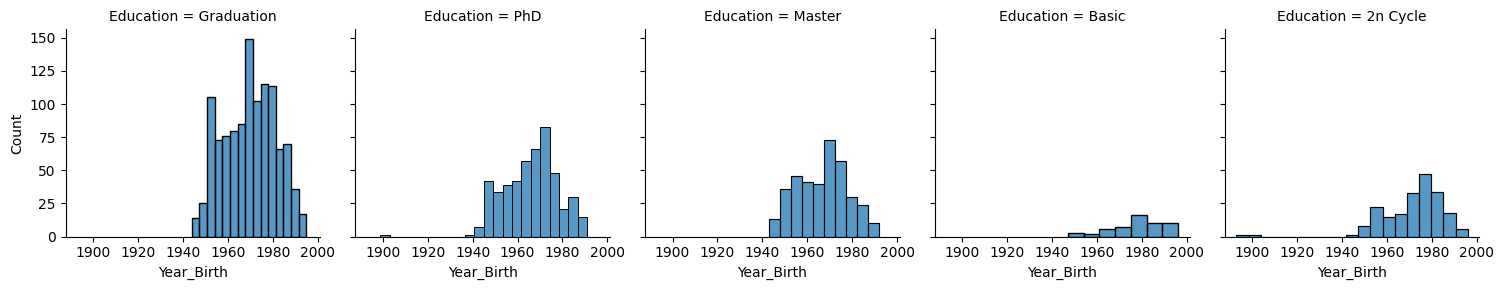

In [65]:
g = sns.FacetGrid(df, col="Education")
g.map(sns.histplot, "Year_Birth", kde=False)
g.add_legend()
plt.show()


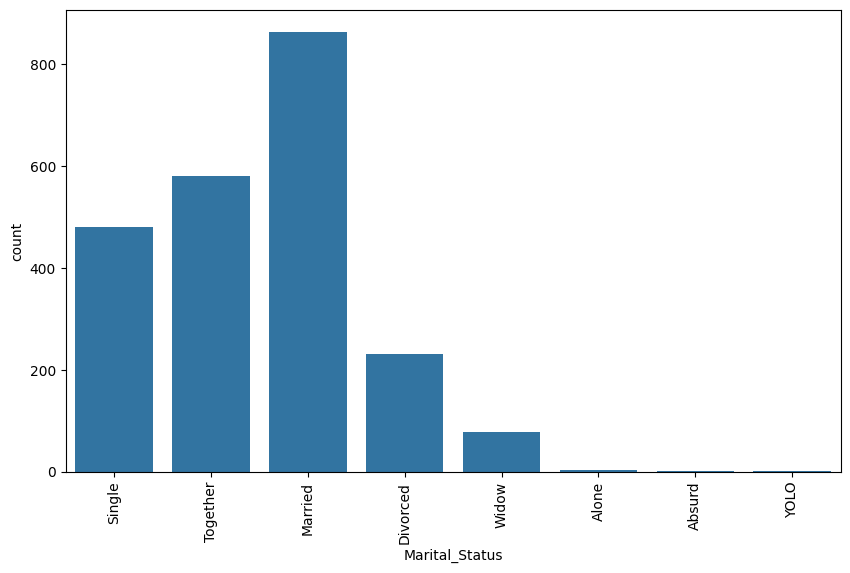

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size for better readability
plt.figure(figsize=(10, 6))

# Plot count plot for Year_Birth and Education
sns.countplot(data=df,x='Marital_Status')
# Rotate the x labels for readability
plt.xticks(rotation=90)
plt.show()


# Data preprocessing

In [69]:
# Dropping non-relevant columns
df = df.drop(columns=['ID', 'Dt_Customer'])


# One-hot encoding for categorical variables (Education, Marital_Status)
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)




In [70]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

print(f"Shape of preprocessed data: {scaled_df.shape}")

Shape of preprocessed data: (2240, 35)


# PCA

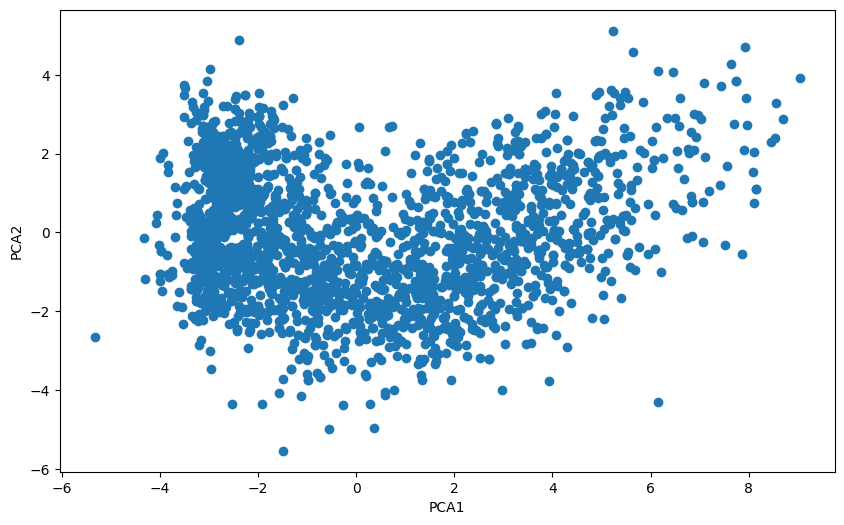

In [72]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization purposes
pca_result = pca.fit_transform(scaled_df)

# Convert PCA results to DataFrame for better visualization
pca_df = pd.DataFrame(data=pca_result, columns=['col1', 'col2'])


# Plot the PCA result
plt.figure(figsize=(10,6))
plt.scatter(pca_df['col1'], pca_df['col2'])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


# Clustering

## DBSCAN

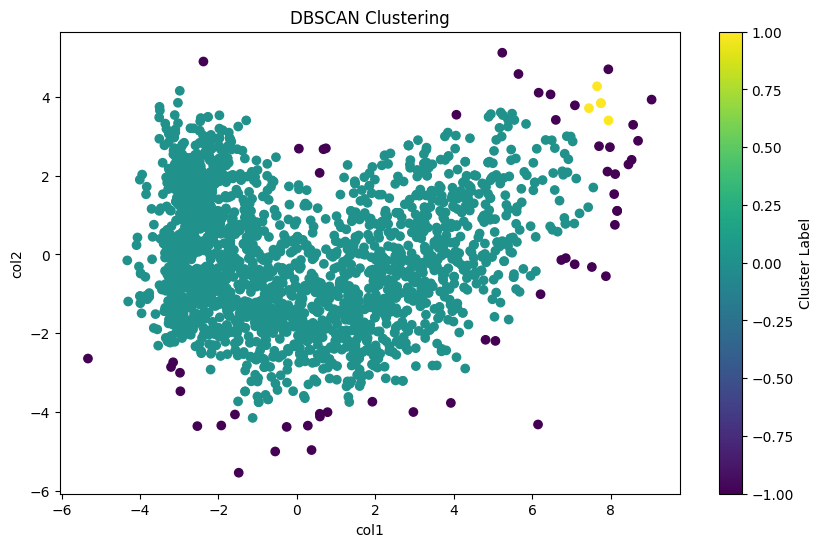

In [73]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# Visualizing DBSCAN clusters
plt.figure(figsize=(10,6))
plt.scatter(pca_df['col1'], pca_df['col2'], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('col1')
plt.ylabel('col2')
plt.colorbar(label='Cluster Label')
plt.show()


## GMM

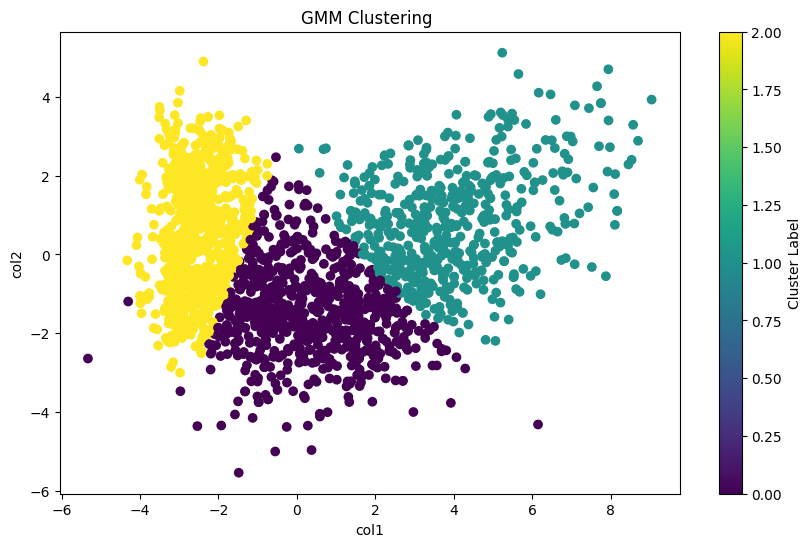

In [74]:
from sklearn.mixture import GaussianMixture

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(pca_df)

# Visualize GMM clusters
plt.figure(figsize=(10,6))
plt.scatter(pca_df['col1'], pca_df['col2'], c=gmm_labels, cmap='viridis', marker='o')
plt.title('GMM Clustering ')
plt.xlabel('col1')
plt.ylabel('col2')
plt.colorbar(label='Cluster Label')
plt.show()


## Kmean

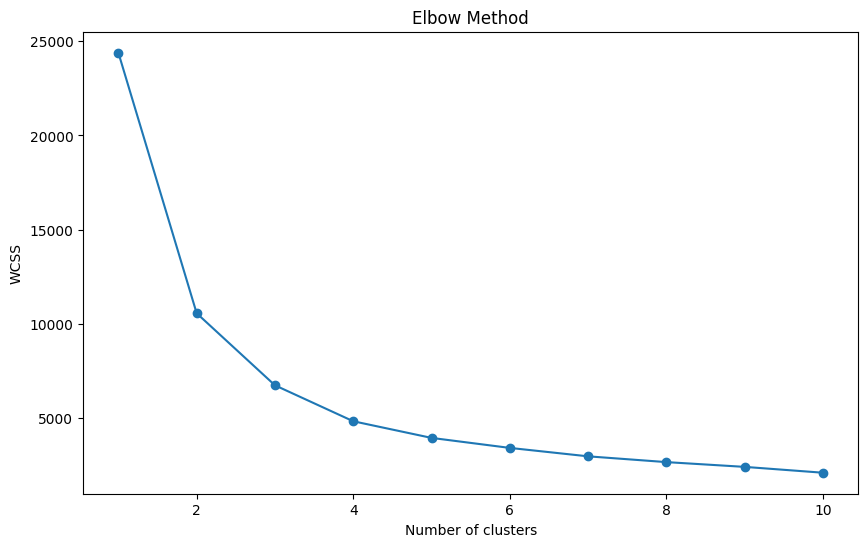

In [75]:
from sklearn.cluster import KMeans
import numpy as np

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


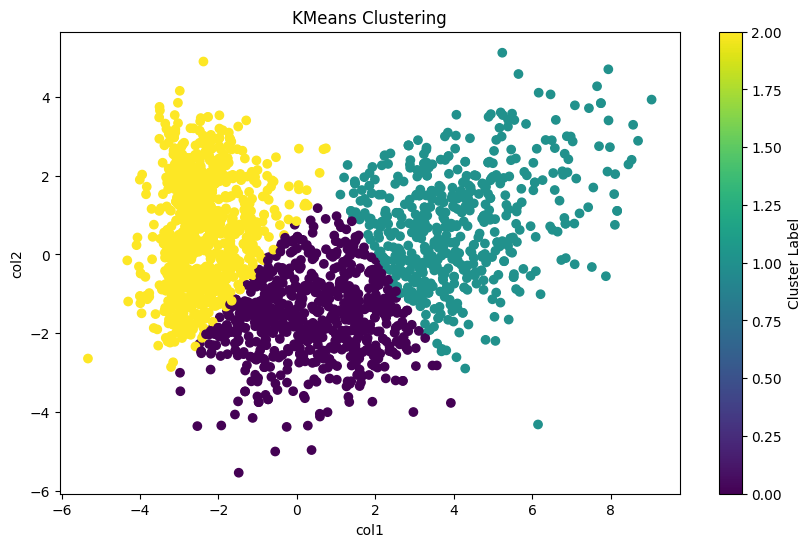

In [76]:
# Apply KMeans clustering with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# Visualizing KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['col1'], pca_df['col2'], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('col1')
plt.ylabel('col2')
plt.colorbar(label='Cluster Label')
plt.show()


# result

It can be seen that KNN and GMM gave same clusters whereas DBSCAN was not that effective here